In [ ]:
!git clone https://github.com/AdilaMB/FARS-dataset.git


Cloning into 'FARS-dataset'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 47 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 1.61 MiB | 3.68 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Example: if the file is in MyDrive root
csv_path = "/content/drive/MyDrive/archive (1)/Traffic_Crashes.csv"  # Adjust the name if needed
df = pd.read_csv(csv_path)

# Show first 5 rows
df.head()


Mounted at /content/drive


,fid_1,objectid,crash_seve,county,crash_date,crash_year,primary_st,distance,dir,secondary,...,objectid_1,area,perimeter,ward,cnty_is,shade,acres,sq_miles,area_1,len
0,18,19,PROPERTY DAMAGE ONLY,CLARK,1/1/2016,2016,ECHELON POINT DR,15,E,FORT APACHE RD,...,304,1.396100e+09,625331.6984,6,0,93,31991.49041,49.986704,1.393544e+09,619305.7196
1,48,49,INJURY CRASH,CLARK,1/1/2016,2016,GRAND CANYON DR,0,AT INT,HORSE DR,...,304,1.396100e+09,625331.6984,6,0,93,31991.49041,49.986704,1.393544e+09,619305.7196
2,55,56,PROPERTY DAMAGE ONLY,CLARK,1/1/2016,2016,SKY POINTE DR,195,E,N BUFFALO DR,...,304,1.396100e+09,625331.6984,6,0,93,31991.49041,49.986704,1.393544e+09,619305.7196
3,78,79,PROPERTY DAMAGE ONLY,CLARK,1/1/2016,2016,CC215S,500,W,CC215S TO DURANGO DR INT 37,...,304,1.396100e+09,625331.6984,6,0,93,31991.49041,49.986704,1.393544e+09,619305.7196
4,89,90,PROPERTY DAMAGE ONLY,CLARK,1/1/2016,2016,US95N,0,AT INT,SR157,...,304,1.396100e+09,625331.6984,6,0,93,31991.49041,49.986704,1.393544e+09,619305.7196


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Preprocessing

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = '/content/dataset.csv'
df = pd.read_csv(file_path)

print("Initial shape:", df.shape)

# -----------------------------------------
# 1. Handle Missing Values
# -----------------------------------------
print("\nMissing values before cleaning:\n", df.isnull().sum())

# No missing values found in this dataset
# If there were, we could use: df.fillna(), df.dropna(), etc.

# -----------------------------------------
# 2. Remove Duplicate Records
# -----------------------------------------
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop duplicates if any
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

# -----------------------------------------
# 3. Detect and Treat Outliers
# Using IQR method
# -----------------------------------------
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        before = data.shape[0]
        data = data[(data[col] >= lower) & (data[col] <= upper)]
        after = data.shape[0]
        print(f"Removed {before - after} outliers from '{col}'")
    return data

# Treating outliers in all numeric columns
numeric_cols = ['lv', '2_wheeler', 'hv', 'total_time']
df = remove_outliers_iqr(df, numeric_cols)

# -----------------------------------------
# 4. Convert Data Types (if necessary)
# -----------------------------------------
print("\nData types:\n", df.dtypes)

# All are int64 – consistent for ML models.

# -----------------------------------------
# 5. Encode Categorical Variables
# (None in this dataset, but showing an example)
# -----------------------------------------
# Example: if 'signal_type' column existed
# df['signal_type_encoded'] = df['signal_type'].astype('category').cat.codes

# -----------------------------------------
# 6. Normalize/Standardize Features
# (Recommended for ML models like KNN, SVM)
# -----------------------------------------
scaler = StandardScaler()
X = df[['lv', '2_wheeler', 'hv']]
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nStandardized features preview:")
print(X_scaled_df.head())

# Final target
y = df['total_time'].reset_index(drop=True)

# Combine features and target for model input (optional)
final_df = pd.concat([X_scaled_df, y], axis=1)

# -----------------------------------------
# Final Output
# -----------------------------------------
print("\n✅ Final processed data shape:", final_df.shape)
print("Ready for training and model building.")

Initial shape: (1000, 4)

Missing values before cleaning:
 lv            0
2_wheeler     0
hv            0
total_time    0
dtype: int64

Number of duplicate rows: 60
Shape after removing duplicates: (940, 4)
Removed 0 outliers from 'lv'
Removed 0 outliers from '2_wheeler'
Removed 0 outliers from 'hv'
Removed 0 outliers from 'total_time'

Data types:
 lv            int64
2_wheeler     int64
hv            int64
total_time    int64
dtype: object

Standardized features preview:
         lv  2_wheeler        hv
0 -1.600224  -1.433593 -1.217932
1 -1.381811  -1.829102 -1.217932
2 -0.944985  -1.908203 -1.217932
3 -1.600224  -1.829102 -1.217932
4 -1.381811  -1.670898 -1.217932

✅ Final processed data shape: (940, 4)
Ready for training and model building.


EDA

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# Load preprocessed dataset (assuming previous steps are done)
file_path = '/content/dataset.csv'
df = pd.read_csv(file_path)

# Drop outliers using the same logic as before
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

df = remove_outliers_iqr(df, ['lv', '2_wheeler', 'hv', 'total_time'])

# -------------------------------------------
# 1. Feature: Total Vehicle Count
# -------------------------------------------
df['total_vehicles'] = df['lv'] + df['2_wheeler'] + df['hv']
# ✅ Justification: Total load on the intersection

# -------------------------------------------
# 2. Feature: Heavy Vehicle Ratio
# -------------------------------------------
df['hv_ratio'] = df['hv'] / df['total_vehicles']
# ✅ Justification: Heavy vehicles slow traffic disproportionately

# -------------------------------------------
# 3. Feature: Light-to-Two-Wheeler Ratio
# -------------------------------------------
df['lv_2w_ratio'] = df['lv'] / (df['2_wheeler'] + 1)  # Avoid division by zero
# ✅ Justification: Helps understand dominance of vehicle type

# -------------------------------------------
# 4. Polynomial Features (optional but useful for tree-free models)
# -------------------------------------------
X = df[['lv', '2_wheeler', 'hv']]
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
poly_feature_names = poly.get_feature_names_out(X.columns)

df_poly = pd.DataFrame(X_poly, columns=poly_feature_names)

# Keep original + new features (can also select based on model performance later)
df = df.join(df_poly, lsuffix='_caller', rsuffix='_other') # This line was changed

# -------------------------------------------
# 5. PCA (Optional – Dimensionality Reduction)
# -------------------------------------------
# Apply PCA to reduce high-dimensional polynomial features
# NOTE: Keep only for visualization or if needed
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_poly)
df['pca_1'] = X_pca[:, 0]
df['pca_2'] = X_pca[:, 1]

# -------------------------------------------
# Final Shape and Preview
# -------------------------------------------
print("Final feature-engineered dataset shape:", df.shape)
print(df.head())

# Separate features and target for modeling
features = df.drop(columns=['total_time'])
target = df['total_time']


Final feature-engineered dataset shape: (1000, 18)
   lv_caller  2_wheeler_caller  hv_caller  total_time  total_vehicles  \
0          2                10          1          12              13   
1          3                 5          1           9               9   
2          5                 4          1          10              10   
3          2                 5          1           8               8   
4          3                 7          1          11              11   

   hv_ratio  lv_2w_ratio  lv_other  2_wheeler_other  hv_other  lv^2  \
0  0.076923     0.181818       2.0             10.0       1.0   4.0   
1  0.111111     0.500000       3.0              5.0       1.0   9.0   
2  0.100000     1.000000       5.0              4.0       1.0  25.0   
3  0.125000     0.333333       2.0              5.0       1.0   4.0   
4  0.090909     0.375000       3.0              7.0       1.0   9.0   

   lv 2_wheeler  lv hv  2_wheeler^2  2_wheeler hv  hv^2       pca_1  \
0          2

FEATURE ENGINEERING


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# Load preprocessed dataset
file_path = '/content/dataset.csv'
df = pd.read_csv(file_path)

# ----------------------------------------------------
# Step 1: Remove Outliers
# ----------------------------------------------------
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

df = remove_outliers_iqr(df, ['lv', '2_wheeler', 'hv', 'total_time'])

# ----------------------------------------------------
# Step 2: Feature Engineering
# ----------------------------------------------------
df['total_vehicles'] = df['lv'] + df['2_wheeler'] + df['hv']
df['hv_ratio'] = df['hv'] / df['total_vehicles']
df['lv_2w_ratio'] = df['lv'] / (df['2_wheeler'] + 1)  # Avoid div by zero

# ----------------------------------------------------
# Step 3: Polynomial Features
# ----------------------------------------------------
X = df[['lv', '2_wheeler', 'hv']]
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
poly_feature_names = poly.get_feature_names_out(X.columns)
df_poly = pd.DataFrame(X_poly, columns=poly_feature_names, index=df.index)

# Remove duplicate columns from df_poly before joining
df_poly_reduced = df_poly.drop(columns=['lv', '2_wheeler', 'hv'])

# Join the new polynomial features
df = df.join(df_poly_reduced)

# ----------------------------------------------------
# Step 4: PCA for Dimensionality Reduction (Optional)
# ----------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_poly_reduced)
df['pca_1'] = X_pca[:, 0]
df['pca_2'] = X_pca[:, 1]

# ----------------------------------------------------
# Final Output
# ----------------------------------------------------
print("✅ Final feature-engineered dataset shape:", df.shape)
print(df.head())

# Separate features and target
features = df.drop(columns=['total_time'])
target = df['total_time']


Model Building

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Replace this if your task is classification
X = features
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

# KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Function to evaluate
def classification_report(name, y_test, y_pred):
    print(f"\n📋 {name} Performance:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("Recall   :", recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print("F1 Score :", f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Evaluate both
classification_report("Decision Tree Classifier", y_test, y_pred_dt)
classification_report("KNN Classifier", y_test, y_pred_knn)

Data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# Assume y_test, y_pred_dt, y_pred_knn, X_train, dt_model are defined

# --------------------------------------------
# 1. Residual Plots
# --------------------------------------------
residuals_dt = y_test - y_pred_dt
residuals_knn = y_test - y_pred_knn

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_dt, y=residuals_dt, color='royalblue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Decision Tree Residual Plot')
plt.xlabel('Predicted Total Time')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_knn, y=residuals_knn, color='seagreen')
plt.axhline(0, color='red', linestyle='--')
plt.title('KNN Residual Plot')
plt.xlabel('Predicted Total Time')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# 🔍 Interpretation: Residuals near zero & no clear pattern = good model fit

# --------------------------------------------
# 2. Predicted vs Actual
# --------------------------------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_dt, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Decision Tree: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_knn, color='mediumseagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('KNN: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

# 🔍 Interpretation: Closer to diagonal = more accurate predictions

# 🔍 Interpretation: Higher bars = more influence on total_time

# --------------------------------------------
# 4. Performance Comparison (MAE, RMSE, R²)
# --------------------------------------------
models = ['Decision Tree', 'KNN']
mae_scores = [mean_absolute_error(y_test, y_pred_dt), mean_absolute_error(y_test, y_pred_knn)]
rmse_scores = [np.sqrt(mean_squared_error(y_test, y_pred_dt)), np.sqrt(mean_squared_error(y_test, y_pred_knn))]
r2_scores = [r2_score(y_test, y_pred_dt), r2_score(y_test, y_pred_knn)]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, mae_scores, width, label='MAE', color='cornflowerblue')
plt.bar(x, rmse_scores, width, label='RMSE', color='lightcoral')
plt.bar(x + width, r2_scores, width, label='R² Score', color='mediumseagreen')

plt.xticks(x, models)
plt.ylabel('Error / Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# 🔍 Interpretation:
# - Lower MAE and RMSE = better error performance
# - Higher R² = better explained variance

2nd dataset


In [ ]:
# prompt: read this csv file /content/Traffic_Crashes_-_Crashes.csv

import pandas as pd

# Assuming the file is in the specified path after git clone
file_path = "/content/Traffic_Crashes_-_Crashes.csv"

try:
  ddf = pd.read_csv(file_path)
  print(ddf.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Make sure you've cloned the repository correctly and the file exists.")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file. Check if the file format is valid.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


                                     CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...              NaN   
1  2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...              NaN   
2  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...              NaN   
3  7ebf015016f83d09b321afd671a836d6b148330535d5df...              NaN   
4  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   

               CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  09/05/2023 07:05:00 PM                  30         TRAFFIC SIGNAL   
1  09/22/2023 06:45:00 PM                  50            NO CONTROLS   
2  07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
3  08/09/2023 11:00:00 PM                  30            NO CONTROLS   
4  08/18/2023 12:50:00 PM                  15                  OTHER   

       DEVICE_CONDITION WEATHER_CONDITION      LIGHTING_CONDITION  \
0  FUNCTIONING PROPERLY             CLEAR                  

data missing values

In [ ]:
# prompt: show missing values

# Assuming df is already defined from the previous code
print(ddf.isnull().sum())


CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 735350
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         595950
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       23258
CRASH_TYPE                            0
INTERSECTION_RELATED_I           612741
NOT_RIGHT_OF_WAY_I               758229
HIT_AND_RUN_I                    546330
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [ ]:
# prompt: ignore this colulmns STREET_DIRECTION, STREET_NO, DOORING_I, PHOTOS_TAKEN_I, STATEMENTS_TAKEN_I, WORK_ZONE_TYPE

columns_to_ignore = ['STREET_DIRECTION', 'STREET_NO', 'DOORING_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'WORK_ZONE_TYPE']
ddf = ddf.drop(columns=columns_to_ignore, errors='ignore')


In [ ]:
ddf.dtypes

,0
CRASH_RECORD_ID,object
CRASH_DATE_EST_I,object
CRASH_DATE,object
POSTED_SPEED_LIMIT,int64
TRAFFIC_CONTROL_DEVICE,object
DEVICE_CONDITION,object
WEATHER_CONDITION,object
LIGHTING_CONDITION,object
FIRST_CRASH_TYPE,object
TRAFFICWAY_TYPE,object


In [ ]:
ddf.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,794956.000000,1.990060e+05,794951.000000,794956.000000,793215.000000,793215.000000,793215.000000,793215.000000,793215.000000,793215.000000,793215.0,794956.000000,794956.000000,794956.000000,789567.000000,789567.000000
mean,28.402547,1.333032e+01,1242.916397,2.034919,0.189448,0.001195,0.020032,0.107025,0.061195,2.004313,0.0,13.202800,4.122344,6.787978,41.854788,-87.673450
std,6.179272,2.961623e+03,705.268208,0.452475,0.565654,0.037456,0.165673,0.422095,0.318451,1.158715,0.0,5.568727,1.980411,3.405398,0.337523,0.686153
min,0.000000,0.000000e+00,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782429,-87.721709
50%,30.000000,2.000000e+00,1211.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874743,-87.674094
75%,30.000000,4.000000e+00,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924336,-87.633300
max,99.000000,1.191625e+06,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [ ]:
ddf.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


Data preprocessing

In [ ]:
# prompt: clean the dataset

# Assuming df is already defined from the previous code

# Remove rows with missing values in key columns (adjust as needed)
ddf = ddf.dropna(subset=['LATITUDE', 'LONGITUDE', 'LOCATION'])

# Fill missing values in other columns
# For categorical columns, replace NaN with 'UNKNOWN'
categorical_columns = ['CRASH_DATE_EST_I', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 'CRASH_TYPE']
for column in categorical_columns:
    ddf[column] = ddf[column].fillna('UNKNOWN')

# For numerical columns, fill with the median
numerical_columns = ['POSTED_SPEED_LIMIT', 'CRASH_HOUR', 'INJURIES_FATAL']
for column in numerical_columns:
    ddf[column] = ddf[column].fillna(ddf[column].median())

# Drop columns deemed irrelevant
columns_to_drop = ['STREET_DIRECTION', 'STREET_NO', 'DOORING_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'WORK_ZONE_TYPE']
ddf = ddf.drop(columns=columns_to_drop, errors='ignore')

# Additional cleaning steps if necessary
# Example: Convert data types
# Example: Remove duplicates


# Verify the cleaning
print(ddf.isnull().sum()) # Check for remaining missing values
print(ddf.dtypes) # Check data types
print(ddf.describe()) # Summary statistics
ddf.head() # Display the first few rows


<ipython-input-24-6c3332e9657e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf[column] = ddf[column].fillna('UNKNOWN')


CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                      0
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         591461
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       23157
CRASH_TYPE                            0
INTERSECTION_RELATED_I           608313
NOT_RIGHT_OF_WAY_I               753050
HIT_AND_RUN_I                    542021
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NAME                           0
BEAT_OF_OCCURRENCE                    3


,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,UNKNOWN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
18,fd05285e9d273fe20cbbebf84794045828a2ba589073b6...,UNKNOWN,07/29/2023 02:30:00 PM,10,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,ANGLE,PARKING LOT,...,0.0,0.0,2.0,0.0,14,7,7,41.809781,-87.594213,POINT (-87.594212812011 41.809781151018)
19,fda2491d33ac819033f4aaa7ed901120f2f6785b7e5bbb...,UNKNOWN,07/29/2023 12:50:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DARKNESS,SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,0,7,7,41.899225,-87.696642,POINT (-87.696642374961 41.899224596015)
27,4a1f7a24129e5e1d4a7a2fd44ab6f8822a20bcdb2f627f...,UNKNOWN,08/13/2023 10:10:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,4.0,0.0,10,1,8,41.975853,-87.709134,POINT (-87.709134319958 41.975852858025)
28,1ee2180a89cc02c0b756f95b5b2755bb5cc9d93450f5ca...,UNKNOWN,08/09/2023 07:55:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING IMPROPERLY,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,...,5.0,0.0,0.0,0.0,19,4,8,41.758246,-87.626522,POINT (-87.626521907009 41.758245504966)


In [ ]:
# Convert data types
ddf['LATITUDE'] = ddf['LATITUDE'].astype('float64')
ddf['LONGITUDE'] = ddf['LONGITUDE'].astype('float64')
ddf['POSTED_SPEED_LIMIT'] = ddf['POSTED_SPEED_LIMIT'].astype('float64')
ddf['CRASH_HOUR'] = ddf['CRASH_HOUR'].astype('int64')
# Fill NaN values with 0 before converting to int64
ddf['INJURIES_TOTAL'] = ddf['INJURIES_TOTAL'].fillna(0).astype('int64')
ddf['CRASH_TYPE'] = ddf['CRASH_TYPE'].astype('category')
ddf['DEVICE_CONDITION'] = ddf['DEVICE_CONDITION'].astype('category')
ddf['WEATHER_CONDITION'] = ddf['WEATHER_CONDITION'].astype('category')
ddf['LIGHTING_CONDITION'] = ddf['LIGHTING_CONDITION'].astype('category')
ddf['TRAFFICWAY_TYPE'] = ddf['TRAFFICWAY_TYPE'].astype('category')

 Remove duplicates

In [ ]:
# prompt: Remove duplicates

# ... (Your existing code)

# Remove duplicates
ddf = ddf.drop_duplicates()

# Verify the cleaning (including checking for duplicates)
print(ddf.isnull().sum())  # Check for remaining missing values
print(ddf.dtypes)  # Check data types
print(ddf.describe())  # Summary statistics
ddf.head()  # Display the first few rows
print(f"Number of rows after removing duplicates: {len(ddf)}") # Check number of rows



CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                      0
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         591461
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       23157
CRASH_TYPE                            0
INTERSECTION_RELATED_I           608313
NOT_RIGHT_OF_WAY_I               753050
HIT_AND_RUN_I                    542021
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NAME                           0
BEAT_OF_OCCURRENCE                    3


In [ ]:
# Label as '1' if there's any injury => risky/accident-prone zone
# Label as '0' otherwise
ddf['IS_ACCIDENT_ZONE'] = ddf['INJURIES_TOTAL'].apply(lambda x: 1 if x > 0 else 0)
# Define features and target
X = ddf.drop(columns=['IS_ACCIDENT_ZONE', 'CRASH_RECORD_ID', 'CRASH_DATE', 'CRASH_DATE_EST_I', 'DATE_POLICE_NOTIFIED', 'LOCATION', 'STREET_NAME'])
y = ddf['IS_ACCIDENT_ZONE']


Data Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer  # For handling missing values
import gc
import warnings

# Suppress warnings about missing columns
warnings.filterwarnings("ignore", message=".*not found in axis")

# Sample a smaller subset of data for faster debugging
ddf = ddf.sample(n=5000, random_state=42)

# Drop non-numeric and non-informative columns
# Check if columns exist before dropping to avoid KeyError
columns_to_drop = ['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'STREET_NAME', 'LOCATION']
for column in columns_to_drop:
    if column in ddf.columns:
        ddf = ddf.drop(columns=[column])
    # else:  # Remove or comment out the print statement
    #     print(f"Column '{column}' not found in DataFrame. Skipping.")

# One-hot encoding for categorical features
ddf = pd.get_dummies(ddf, drop_first=True)

# Convert numeric columns to more memory-efficient types
ddf['NUM_UNITS'] = ddf['NUM_UNITS'].astype('int8')
ddf['LATITUDE'] = ddf['LATITUDE'].astype('float32')

# 1. Define feature set and target
X = ddf.drop(columns=['IS_ACCIDENT_ZONE'])  # drop the target column
y = ddf['IS_ACCIDENT_ZONE']

# Imputation for missing values (using the mean for numeric columns)
imputer = SimpleImputer(strategy='mean')  # You can also use median or most_frequent
X_imputed = imputer.fit_transform(X)

# 2. Split the data into training and testing sets (stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42, stratify=y)

# 3. Logistic Regression
try:
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    print("=== Logistic Regression ===")
    print(classification_report(y_test, y_pred_lr))
except Exception as e:
    print(f"Error in Logistic Regression: {e}")

# 4. Random Forest Classifier (with fewer trees to reduce memory usage)
try:
    rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    print("=== Random Forest ===")
    print(classification_report(y_test, y_pred_rf))
except Exception as e:
    print(f"Error in Random Forest: {e}")

# Instead of deleting, keep the variables for the next cell
# del X_train, X_test, y_train, y_test  # Comment out or remove this line
# gc.collect() # Comment out or remove this line

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1297
           1       1.00      1.00      1.00       203

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1297
           1       1.00      0.97      0.98       203

    accuracy                           1.00      1500
   macro avg       1.00      0.98      0.99      1500
weighted avg       1.00      1.00      1.00      1500



Data Visualization

Random Forest - MAE: 0.0047, RMSE: 0.0683, R²: 0.9601
Logistic Regression - MAE: 0.0000, RMSE: 0.0000, R²: 1.0000


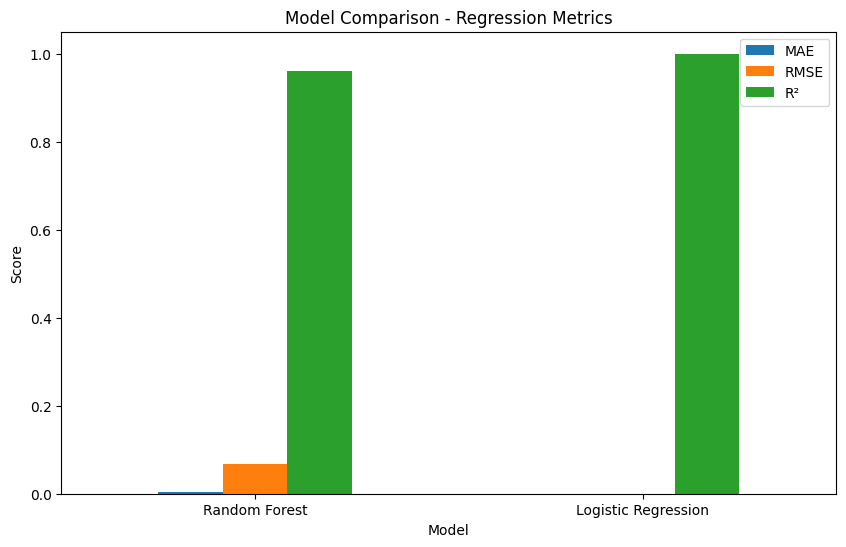

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have made predictions using Random Forest and Logistic Regression models
# y_test is the actual values and y_pred_rf, y_pred_lr are the predicted values for Random Forest and Logistic Regression

# 1. Calculate MAE, RMSE, and R² for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# 2. Calculate MAE, RMSE, and R² for Logistic Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Displaying the metrics
print(f"Random Forest - MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")
print(f"Logistic Regression - MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}")

# 3. Plotting the comparison of these metrics between both models
metrics = {
    'MAE': [mae_rf, mae_lr],
    'RMSE': [rmse_rf, rmse_lr],
    'R²': [r2_rf, r2_lr]
}

# Convert to DataFrame for easy plotting
metrics_df = pd.DataFrame(metrics, index=['Random Forest', 'Logistic Regression'])

# Plot the metrics
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison - Regression Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.show()


Confusion Matrix

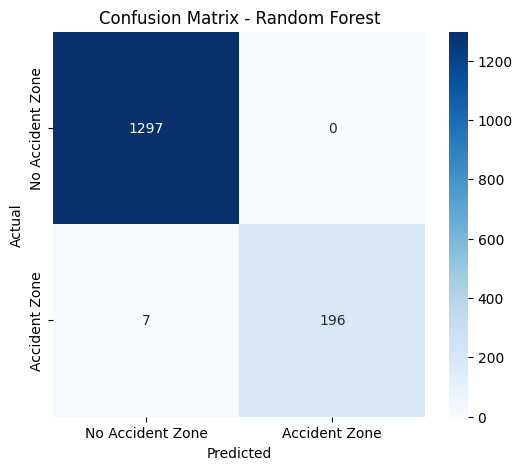

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Accident Zone', 'Accident Zone'], yticklabels=['No Accident Zone', 'Accident Zone'])
plt.title("Confusion Matrix - Random Forest")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


ROC Curve

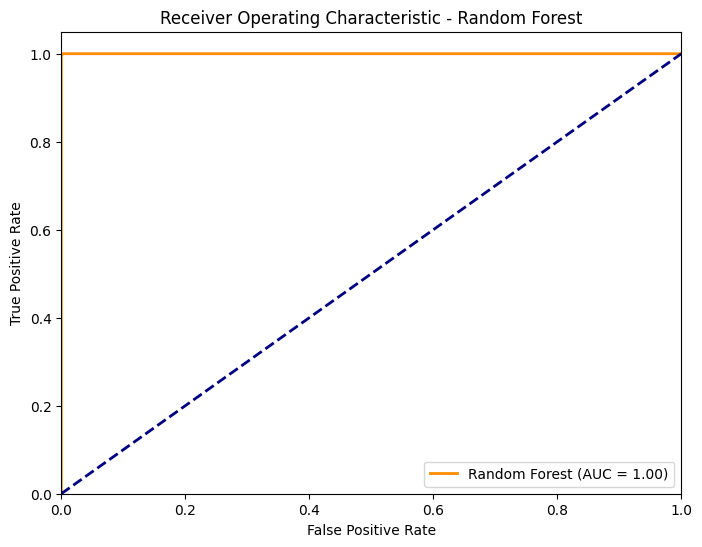

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])  # Random Forest probability
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()


Residual plot

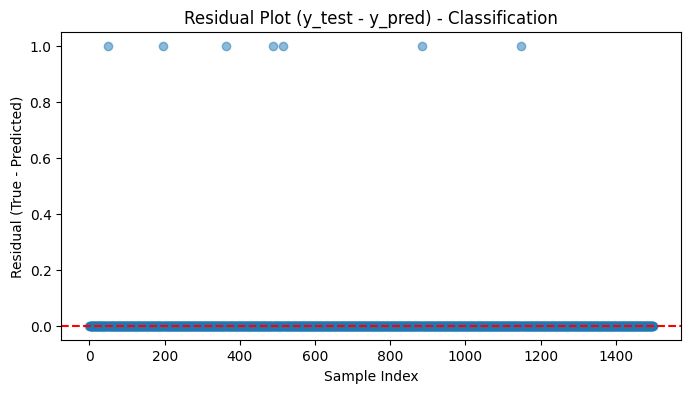

In [ ]:
import matplotlib.pyplot as plt

# Residuals for classification: difference between actual and predicted class
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 4))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (y_test - y_pred) - Classification')
plt.xlabel('Sample Index')
plt.ylabel('Residual (True - Predicted)')
plt.show()


Feature importances

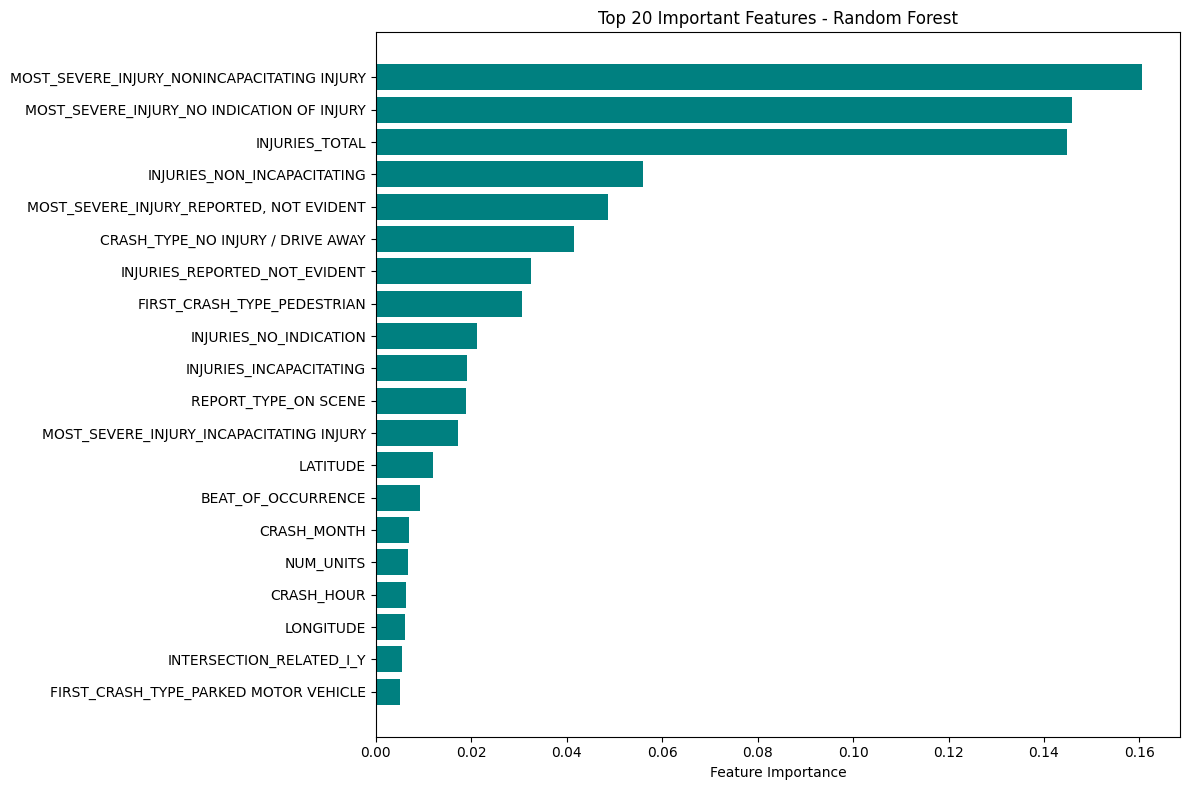

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming ddf is the final preprocessed DataFrame used for modeling
# and includes one-hot encoded features

# Define X and y again to get correct column names
X = ddf.drop(columns=['IS_ACCIDENT_ZONE'])
y = ddf['IS_ACCIDENT_ZONE']

# If you had done train_test_split earlier:
# X_train, X_test, y_train, y_test = train_test_split(X, y, ...)

# Feature importances from trained model
importances = rf_model.feature_importances_
feature_names = X.columns  # Use the full encoded DataFrame

# Sanity check
assert len(importances) == len(feature_names), "Mismatch between importances and features"

# Create DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(feat_imp_df['Feature'].head(20), feat_imp_df['Importance'].head(20), color='teal')
plt.xlabel('Feature Importance')
plt.title('Top 20 Important Features - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# 1) Prepare DataFrame
df = ddf.copy()
assert 'IS_ACCIDENT_ZONE' in df.columns

# Ensure total_vehicles exists
if 'total_vehicles' not in df:
    to_sum = [c for c in ['NUM_UNITS','INJURIES_TOTAL'] if c in df]
    df['total_vehicles'] = df[to_sum].sum(axis=1)

# Select numeric features (excluding the target)
numeric = df.select_dtypes(include='number').columns.drop('IS_ACCIDENT_ZONE')
X = df[numeric]
y = df['IS_ACCIDENT_ZONE']

# 2) Impute & train RandomForest
imp = SimpleImputer(strategy='mean')
X_imp = imp.fit_transform(X)

rf = RandomForestClassifier(n_estimators=30, random_state=42).fit(X_imp, y)
importances = pd.Series(rf.feature_importances_, index=numeric).sort_values(ascending=False)

# 3) Class distribution
dist = y.value_counts(normalize=True)
labels = dist.index.astype(str)
values = dist.values

# 4) Build dashboard (NUM_UNITS vs INJURIES_TOTAL)
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Feature Importance","NUM_UNITS vs INJURIES_TOTAL","Class Distribution"),
    specs=[[{"type":"bar"},{"type":"scatter"},{"type":"domain"}]]
)

# Panel 1: feature importances
fig.add_trace(
    go.Bar(x=importances.values, y=importances.index, orientation='h',
           marker=dict(color=importances.values, colorscale='Viridis')),
    row=1, col=1
)

# Panel 2: scatter NUM_UNITS vs INJURIES_TOTAL
fig.add_trace(
    go.Scatter(
        x=df['NUM_UNITS'], y=df['INJURIES_TOTAL'],
        mode='markers',
        marker=dict(color=y, colorscale='Turbo', showscale=True, colorbar=dict(title="Zone")),
        text=y
    ), row=1, col=2
)

# Panel 3: donut chart
fig.add_trace(
    go.Pie(labels=labels, values=values, hole=0.5, textinfo='percent+label'),
    row=1, col=3
)

fig.update_layout(
    title="📊 Accident‑Zone Classification Dashboard",
    height=600, width=1200,
    showlegend=False
)

fig.show()
